In [1]:
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, LambdaCallback
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import glob
import cv2
import numpy as np
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**이미지를 불러와서 순서대로 리스트에 추가**

In [ ]:
data = []

images = glob.glob('/content/drive/My Drive/KJ/face2/*')
images.sort()

for i in range(len(images)):
  img = load_img(images[i])
  img = img_to_array(img)
  data.append(img)
data = np.array(data)
data = data / 255
print(data.shape)

(4112, 224, 224, 3)


**넘파이 이미지 배열 저장**

In [ ]:
np.save("/content/drive/My Drive/KJ/array_data.npy", data)
#array_data.npy 용량 부족으로 삭제

**넘파이 이미지 배열 로드**

In [ ]:
data = np.load("/content/drive/My Drive/KJ/array_data.npy")
print(data.shape)
data = data - .5

(4112, 224, 224, 3)


**이미지 좌우 반전**

In [ ]:
reversedData = []
for img in data:
  reversedData.append(cv2.flip(img, 1))

In [ ]:
reversedData = np.array(reversedData)
reversedData.shape

(4112, 224, 224, 3)

In [ ]:
data = np.concatenate((data, reversedData))
print(data.shape)

(8224, 224, 224, 3)


**좌우 반전 이미지 확인**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


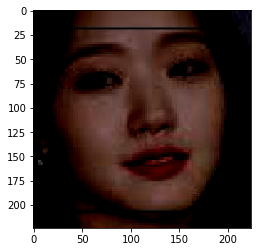

In [ ]:
plt.imshow(data[411])

**8224개 이미지 배열로 저장**

In [ ]:
np.save("/content/drive/My Drive/KJ/array_data_8224.npy", data)

**8224개 이미지 배열 로드**

In [ ]:
data = np.load("/content/drive/My Drive/KJ/array_data_8224.npy")
print(data.shape)

(8224, 224, 224, 3)


**이미지 1도 회전**

In [ ]:
data = data - .5

In [ ]:
rotatedData = []
for img in data:
  height, width, channel = img.shape
  matrix = cv2.getRotationMatrix2D((width/2, height/2), 1, 1)
  dst = cv2.warpAffine(img, matrix, (width, height))
  rotatedData.append(dst)

In [ ]:
rotatedData = np.array(rotatedData)
rotatedData.shape

(4112, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


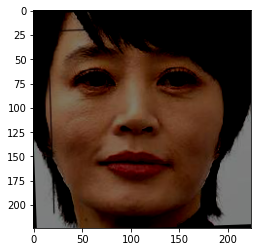

In [ ]:
plt.imshow(rotatedData[0])

In [ ]:
np.save("/content/drive/My Drive/KJ/rotatedData2_array_data_4112.npy", rotatedData)

In [ ]:
data = np.concatenate((data,rotatedData))
print(data.shape)

(16448, 224, 224, 3)


**회전 이미지 확인**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


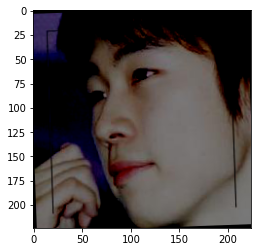

In [ ]:
plt.imshow(rotatedData[8221])

**원본, 좌우반전, 1도회전 이미지 리스트 저장**

In [ ]:
np.save("/content/drive/My Drive/KJ/array_data_16448.npy", data)

**중간 추가 작업**

In [ ]:
data1 = np.load("/content/drive/My Drive/KJ/array_data_16448.npy")
data2 = np.load("/content/drive/My Drive/KJ/rotatedData2_array_data_4112.npy")
print(data1.shape)
print(data2.shape)

(16448, 224, 224, 3)
(4112, 224, 224, 3)


In [ ]:
data = np.concatenate((data1,data2))
print(data.shape)

(20560, 224, 224, 3)


In [ ]:
np.save("/content/drive/My Drive/KJ/array_data_20560.npy", data)

**16448개 넘파이 이미지 배열 로드**

In [ ]:
data = np.load("/content/drive/My Drive/KJ/array_data_16448.npy")
print(data.shape)

(16448, 224, 224, 3)


**20560개 넘파이 이미지 배열 로드**

In [ ]:
data = np.load("/content/drive/My Drive/KJ/array_data_20560.npy")
print(data.shape)

(20560, 224, 224, 3)


**라벨링 csv 파일 불러와 one hot encoding**

In [ ]:
dataset = np.loadtxt("/content/drive/My Drive/KJ/20560_label_no_over_int.csv", delimiter=",")
dataset.shape

(20560,)

In [ ]:
# dataset = np.concatenate((dataset, dataset))
# dataset.shape

(8224,)

**원본, 좌우반전을 회전한 라벨링 합**

In [ ]:
# dataset = np.concatenate((dataset, dataset))
# dataset.shape

(16448,)

In [ ]:
# labels = pd.read_csv('/content/drive/My Drive/코와머리/label_no_over_int.csv', header=None)
# print(labels)

# labels = np.array(labels[:100])
# print(labels.shape)

# labels = labels.flatten()
# # print(labels)

from tensorflow.keras.utils import to_categorical
labels = to_categorical(dataset, 4)

X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=321, stratify=labels)

**X,Y train/test 변수들 저장**

In [ ]:
np.save("/content/drive/My Drive/KJ/X_train2.npy", X_train)
np.save("/content/drive/My Drive/KJ/X_test2.npy", X_test)
np.save("/content/drive/My Drive/KJ/Y_train2.npy", Y_train)
np.save("/content/drive/My Drive/KJ/Y_test2.npy", Y_test)

**X,Y train/test 변수들 로드**

In [ ]:
X_train = np.load("/content/drive/My Drive/KJ/X_train2.npy")
X_test = np.load("/content/drive/My Drive/KJ/X_test2.npy")
Y_train = np.load("/content/drive/My Drive/KJ/Y_train2.npy")
Y_test = np.load("/content/drive/My Drive/KJ/Y_test2.npy")

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=321, stratify=Y_train)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
# print(X_val.shape)
# print(Y_val.shape)


(16448, 224, 224, 3)
(16448, 4)
(4112, 224, 224, 3)
(4112, 4)


In [ ]:
from keras.callbacks import ModelCheckpoint

resnet50 = ResNet50(weights=None, include_top=True, classes=4)

resnet50.compile(loss='categorical_crossentropy', optimizer=optimizers.adam(), metrics=['acc'])

#early_stopping = EarlyStopping(patience=5, mode='auto', monitor='val_loss')
early_stopping = EarlyStopping(patience=5, mode='auto', monitor='loss')
#mc = ModelCheckpoint('/content/drive/My Drive/KJ/second_model_20560.h5',monitor = 'val_loss', mode = 'auto', save_best_only= True)
mc = ModelCheckpoint('/content/drive/My Drive/KJ/second_model_20560.h5',monitor = 'loss', mode = 'auto', save_best_only= True)

history = resnet50.fit(X_train, Y_train,
                    batch_size=64,
                    epochs=30,
                    #validation_data=(X_val, Y_val),
                    shuffle=True,
                    callbacks=[early_stopping, mc]
                    )

Epoch 1/30
16448/16448 [==============================] - 178s 11ms/step - loss: 0.9941 - acc: 0.6099
Epoch 2/30
16448/16448 [==============================] - 166s 10ms/step - loss: 0.8398 - acc: 0.6477
Epoch 3/30
16448/16448 [==============================] - 166s 10ms/step - loss: 0.7601 - acc: 0.6774
Epoch 4/30
16448/16448 [==============================] - 166s 10ms/step - loss: 0.6703 - acc: 0.7213
Epoch 5/30
16448/16448 [==============================] - 166s 10ms/step - loss: 0.6158 - acc: 0.7481
Epoch 6/30
16448/16448 [==============================] - 166s 10ms/step - loss: 0.5248 - acc: 0.7895
Epoch 7/30
16448/16448 [==============================] - 166s 10ms/step - loss: 0.4537 - acc: 0.8248
Epoch 8/30
16448/16448 [==============================] - 166s 10ms/step - loss: 0.3807 - acc: 0.8526
Epoch 9/30
16448/16448 [==============================] - 166s 10ms/step - loss: 0.3047 - acc: 0.8842
Epoch 10/30
16448/16448 [==============================] - 166s 10ms/step - loss: 

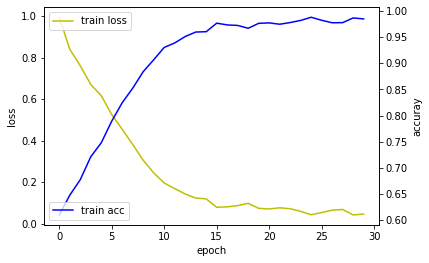

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
#loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history.history['acc'], 'b', label='train acc')
#acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
#모델 평가
print("-- Evaluate --")
# scores = model.evaluate_generator(val_generator, steps=5)
loss_and_metrics = resnet50.evaluate(X_test, Y_test, batch_size=64)
print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))
# print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
4112/4112 [==============================] - 14s 3ms/step

loss : 0.2828760578474646
accuray : 0.9246109127998352


**모델 사용**

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/KJ/first_model_20560.h5')

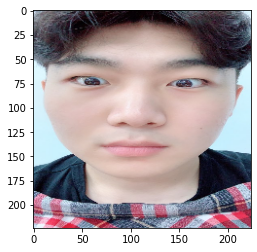

In [ ]:
img = cv2.imread('/content/drive/My Drive/KJ/te6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(224,224))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


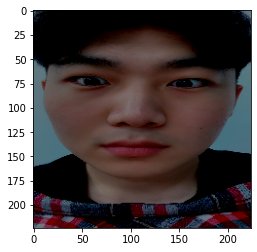

In [ ]:
imgs = []
imgs.append(img)
imgs = np.array(imgs)
print(imgs.shape)
#plt.imshow(imgs[0])
imgs = imgs/ 255
plt.imshow(imgs[0])
imgs = imgs - .5
plt.imshow(imgs[0])
# img = img / 255
# img = img - .5
# imgs = []
# imgs.append(img)
# imgs = np.array(imgs)
# print(imgs.shape)
# plt.imshow(imgs[0])

In [ ]:
y = model.predict(imgs)
print("봄 : " + str(round(y[0][0] * 100,2)) + "%")
print("여름 : " + str(round(y[0][1] * 100,2)) + "%")
print("가을 : " + str(round(y[0][2] * 100,2)) + "%")
print("겨울 : " + str(round(y[0][3] * 100,2)) + "%")

봄 : 0.0%
여름 : 25.3%
가을 : 0.0%
겨울 : 74.7%
